# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
from config import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/my_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

In [4]:
weather_data = pd.DataFrame({"City": cities})

In [5]:
weather_data['Latitude'] = ""
weather_data['Longitude'] = ""
weather_data['Max Temperature'] = ""
weather_data['Humidity'] = ""
weather_data['Cloudiness'] = ""
weather_data['Wind Speed'] = ""
weather_data['Country'] = ""
weather_data['Date'] = ""

In [6]:
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_counter = 1

for index, row in weather_data.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={weather_api_key}&q="
    city = row['City']
    response = requests.get(query_url + city).json()
  
    print(f"Processing Record {city_counter} of Set 1 | {city}")
    city_counter += 1    
    
    try:
        weather_data.loc[index, "Latitude"] = response['coord']['lat']
        weather_data.loc[index, "Longitude"] = response['coord']['lon']
        weather_data.loc[index, "Max Temperature"] = response['main']['temp_max']
        weather_data.loc[index, "Humidity"] = response['main']['humidity']
        weather_data.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_data.loc[index, "Wind Speed"] = response['wind']['speed']
        weather_data.loc[index, "Country"] = response['sys']['country']
        weather_data.loc[index, "Date"] = response['dt']
                
    except (KeyError, IndexError): 
        print("City not found. Skipping....")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | haines junction
Processing Record 4 of Set 1 | rafaela
Processing Record 5 of Set 1 | eureka
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | leningradskiy
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | kuching
Processing Record 12 of Set 1 | suez
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping....
Processing Record 17 of Set 1 | dalbandin
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | birjand
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | mataura
Processin

Processing Record 186 of Set 1 | chapais
Processing Record 187 of Set 1 | jega
Processing Record 188 of Set 1 | cape town
Processing Record 189 of Set 1 | hambantota
Processing Record 190 of Set 1 | bolungarvik
City not found. Skipping....
Processing Record 191 of Set 1 | khartoum
Processing Record 192 of Set 1 | santa isabel do rio negro
Processing Record 193 of Set 1 | saint-pierre
Processing Record 194 of Set 1 | saint-francois
Processing Record 195 of Set 1 | shingu
Processing Record 196 of Set 1 | carnarvon
Processing Record 197 of Set 1 | bandarbeyla
Processing Record 198 of Set 1 | mantua
Processing Record 199 of Set 1 | galgani
City not found. Skipping....
Processing Record 200 of Set 1 | nabinagar
Processing Record 201 of Set 1 | sentyabrskiy
City not found. Skipping....
Processing Record 202 of Set 1 | toila
Processing Record 203 of Set 1 | bathsheba
Processing Record 204 of Set 1 | sidi ali
Processing Record 205 of Set 1 | yabrud
Processing Record 206 of Set 1 | el carmen
Pr

Processing Record 366 of Set 1 | zhigansk
Processing Record 367 of Set 1 | ouesso
Processing Record 368 of Set 1 | west plains
Processing Record 369 of Set 1 | eyl
Processing Record 370 of Set 1 | henties bay
Processing Record 371 of Set 1 | yaan
Processing Record 372 of Set 1 | nyaunglebin
Processing Record 373 of Set 1 | nome
Processing Record 374 of Set 1 | shubarshi
Processing Record 375 of Set 1 | slave lake
Processing Record 376 of Set 1 | cayenne
Processing Record 377 of Set 1 | saint george
Processing Record 378 of Set 1 | port macquarie
Processing Record 379 of Set 1 | torbay
Processing Record 380 of Set 1 | moerai
Processing Record 381 of Set 1 | eenhana
Processing Record 382 of Set 1 | acapulco
Processing Record 383 of Set 1 | aitape
Processing Record 384 of Set 1 | balakhninskiy
Processing Record 385 of Set 1 | hualmay
Processing Record 386 of Set 1 | derzhavinsk
Processing Record 387 of Set 1 | kyshtovka
Processing Record 388 of Set 1 | dulian
Processing Record 389 of Set 

Processing Record 555 of Set 1 | yelan
Processing Record 556 of Set 1 | nobres
Processing Record 557 of Set 1 | umm kaddadah
Processing Record 558 of Set 1 | tidore
City not found. Skipping....
Processing Record 559 of Set 1 | oberstdorf
Processing Record 560 of Set 1 | xiangdong
City not found. Skipping....
Processing Record 561 of Set 1 | meadow lake
Processing Record 562 of Set 1 | saint pete beach
Processing Record 563 of Set 1 | parfino
Processing Record 564 of Set 1 | karlskrona
Processing Record 565 of Set 1 | lodwar
Processing Record 566 of Set 1 | ziniare
Processing Record 567 of Set 1 | sola
Processing Record 568 of Set 1 | dunayivtsi
City not found. Skipping....
Processing Record 569 of Set 1 | abu samrah
Processing Record 570 of Set 1 | paisley
Processing Record 571 of Set 1 | trimbak
Processing Record 572 of Set 1 | lom sak
Processing Record 573 of Set 1 | xixiang
Processing Record 574 of Set 1 | yerbogachen
Processing Record 575 of Set 1 | santo nino
Processing Record 576

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
compression_opts = dict(method='zip',
                        archive_name='my_cities.csv')  
weather_data.to_csv('my_cities.zip', index=False,
          compression=compression_opts)  

In [8]:
weather_data.count()

City               627
Latitude           627
Longitude          627
Max Temperature    627
Humidity           627
Cloudiness         627
Wind Speed         627
Country            627
Date               627
dtype: int64

In [9]:
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,norman wells,65.28,-126.83,283.15,100,75,1.5,CA,1595240541
1,ushuaia,-54.8,-68.3,269.15,92,0,2.6,AR,1595240526
2,haines junction,60.75,-137.51,283.84,85,99,1.33,CA,1595240610
3,rafaela,-31.25,-61.49,285.37,80,28,2.68,AR,1595240949
4,eureka,40.8,-124.16,285.37,100,11,0.55,US,1595240949
...,...,...,...,...,...,...,...,...,...
622,sfantu gheorghe,45.87,25.78,293.71,86,76,4.04,RO,1595241067
623,obera,-27.49,-55.12,290.89,79,3,2.69,AR,1595241067
624,sur,22.57,59.53,306.11,58,42,2.49,OM,1595241067
625,lincoln,40.8,-96.67,294.26,88,90,2.6,US,1595241067


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# weather_data_humidity = weather_data.loc[weather_data["Humidity"] > 100]
# weather_data_humidity

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
#already exported above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
weather_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,norman wells,65.28,-126.83,283.15,100,75,1.5,CA,1595240541
1,ushuaia,-54.8,-68.3,269.15,92,0,2.6,AR,1595240526
2,haines junction,60.75,-137.51,283.84,85,99,1.33,CA,1595240610
3,rafaela,-31.25,-61.49,285.37,80,28,2.68,AR,1595240949
4,eureka,40.8,-124.16,285.37,100,11,0.55,US,1595240949


In [19]:
weather_data.dtypes

City               object
Latitude           object
Longitude          object
Max Temperature    object
Humidity           object
Cloudiness         object
Wind Speed         object
Country            object
Date               object
dtype: object

In [26]:
weather_data["Latitude"] = pd.to_numeric(weather_data["Latitude"], errors='coerce')
weather_data["Max Temperature"] = pd.to_numeric(weather_data["Max Temperature"], errors='coerce')
weather_data["Humidity"] = pd.to_numeric(weather_data["Humidity"], errors='coerce')
weather_data["Cloudiness"] = pd.to_numeric(weather_data["Cloudiness"], errors='coerce')
weather_data["Wind Speed"] = pd.to_numeric(weather_data["Wind Speed"], errors='coerce')

## Latitude vs. Temperature Plot

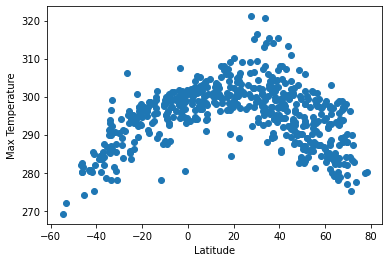

In [38]:
scatter_one = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature']
plt.title = ("City Latitude vs Max Temperature (7/20/2020)")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

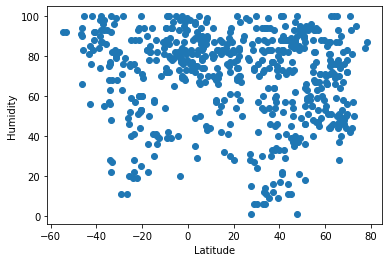

In [28]:
scatter_two = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title = ("City Latitude vs Humidity (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

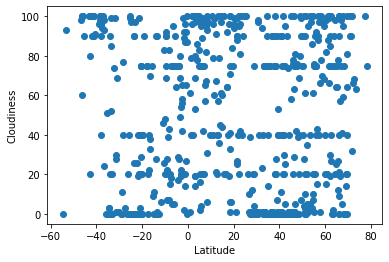

In [29]:
scatter_three = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title = ("City Latitude vs Cloudiness (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

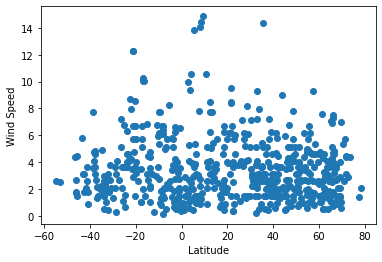

In [30]:
scatter_four = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title = ("City Latitude vs Wind Speed (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression